In [34]:
import os
import pickle
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt

In [27]:
feature_name = "SampEn"
features_path = "../data/Features200"
raw_stages = ["AWA", "N1", "N2", "N3", "REM"]
stages = ["AWA", "NREM", "REM"]
channels = ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'P3', 'P4',
            'O1', 'O2', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'Oz']

In [3]:
with open("../results/lziv/lziv.pkl", "rb") as file:
    lziv, _ = pickle.load(file)

In [4]:
subject_paths = glob.glob(os.path.join(features_path, '*', feature_name))

feature = {}
for stage in raw_stages:
    feature[stage] = {}
    for path in subject_paths:
        # extract the subject id from the current path (second to last element in the path)
        subject_id = path.split(os.sep)[-2]
        # load the file containing the data for the current stage and subject
        feature[stage][subject_id] = np.load(os.path.join(path, f'{feature_name}_{stage}.npy'))

In [5]:
df = pd.read_csv("../data/CAF_200_Inventaire.csv", index_col=0)[["Subject_id", "CAF"]]
mapping = pd.Series(index=df["Subject_id"], data=(df["CAF"] == "Y").values)

In [6]:
feature["NREM"] = {}
for subject in feature["N1"].keys():
    feature["NREM"][subject] = np.concatenate([feature["N1"][subject],
                                               feature["N2"][subject],
                                               feature["N3"][subject]], axis=1)

In [24]:
data = {}
for stage in stages:
    data[stage] = {"CAF": {}, "PLAC": {}}
    for caf_subject in mapping[mapping == True].index:
        data[stage]["CAF"][caf_subject.split("n")[0]] = feature[stage][caf_subject].mean(axis=1)
    for plac_subject in mapping[mapping == False].index:
        data[stage]["PLAC"][plac_subject.split("n")[0]] = feature[stage][plac_subject].mean(axis=1)

In [48]:
stage = "NREM"

subjects = []
lzivs = []
feats = []
for subject in lziv[stage]["CAF"].keys():
    subjects.append(subject)
    lzivs.append(lziv[stage]["CAF"][subject] - lziv[stage]["PLAC"][subject])
    feats.append(data[stage]["CAF"][subject] - data[stage]["PLAC"][subject])
lzivs = np.array(lzivs)
feats = np.array(feats)

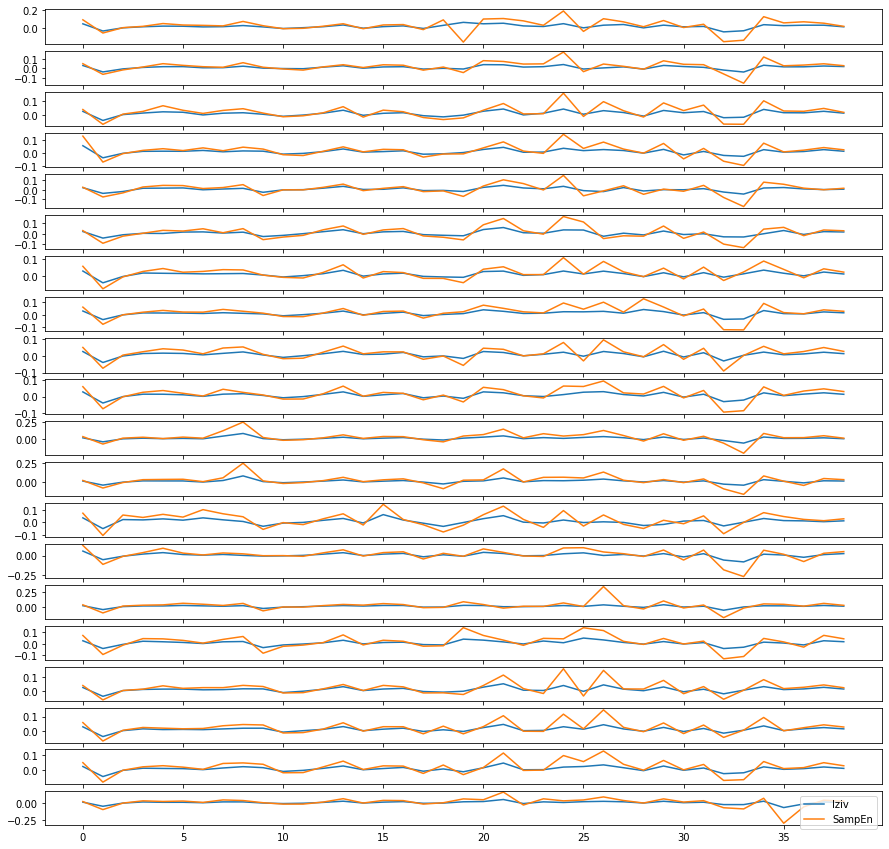

In [61]:
fig, axes = plt.subplots(20, figsize=(15, 15))
for i, ax in enumerate(axes):
    ax.plot(lzivs[:,i], label="lziv")
    ax.plot(feats[:,i], label=feature_name)
plt.legend()